In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
df=pd.read_csv('placement.csv')

In [38]:
df.head(10)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
5,7.30,23.0,1
6,6.69,11.0,0
7,7.12,39.0,1
8,6.45,38.0,0
9,7.75,94.0,1


In [39]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

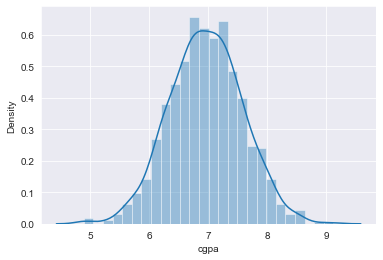

In [40]:
sns.distplot(df['cgpa'])

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

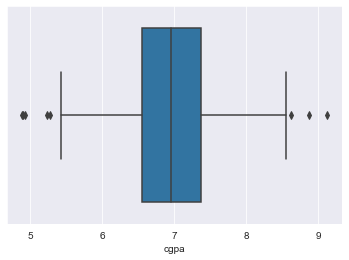

In [41]:
sns.boxplot(df['cgpa'])

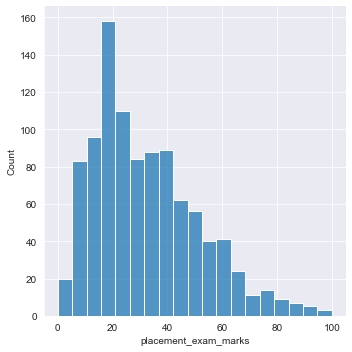

In [42]:
sns.displot(df['placement_exam_marks'])

In [43]:
print("Mean value of cgpa",df['cgpa'].mean())
print("std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


# Finding boundries

In [44]:
print("Highest boundry",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest boundry",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest boundry 8.808933625397177
Lowest boundry 5.113546374602842


# Finding outliers

In [45]:
df[(df['cgpa']>8.808933625397177) | (df['cgpa']<5.113546374602842) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [46]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [55]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


In [54]:
sns.boxplot(new_df)

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Capping

In [57]:
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [58]:
upper_limit

8.799563584169274

In [59]:
lower_limit

5.1234334285799505

In [60]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [61]:
df['cgpa'].describe()

count    1000.000000
mean        6.961509
std         0.612543
min         5.123433
25%         6.550000
50%         6.960000
75%         7.370000
max         8.799564
Name: cgpa, dtype: float64

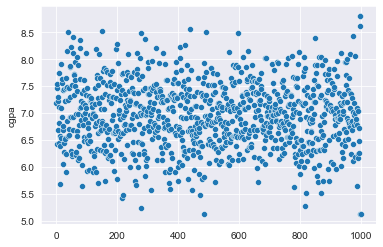

In [63]:
import matplotlib.pyplot as plt

X = df['cgpa']
sns.scatterplot(x=X.index, y=X)
plt.show()

<AxesSubplot:ylabel='cgpa'>

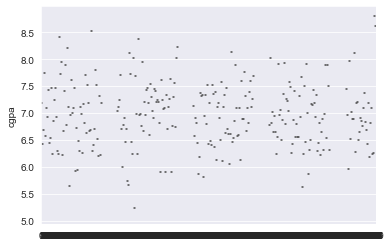

In [64]:
sns.violinplot(x=X.index, y=X, data=df)

C:\Users\zuhai\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


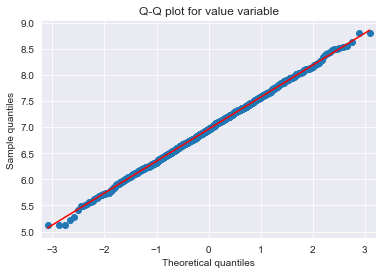

In [66]:
import statsmodels.api as sm




sm.qqplot(df['cgpa'], line='s', marker='o', color='b')
plt.title('Q-Q plot for value variable')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()